In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [93]:
dataset=pd.read_csv("dataSet/titanic.csv")
dataset.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [94]:
#raplace female to 0 and male to 1, in Sex column
dataset['Sex']=dataset['Sex'].replace(['female','male'],[0,1])
dataset.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500


In [95]:
#Generate feature  X and target y
X = dataset[['Pclass','Age','Sex','Siblings/Spouses Aboard','Parents/Children Aboard', 'Fare']].values
y = dataset[['Survived']].values

In [96]:
y = y.ravel()
X

array([[ 3.    , 22.    ,  1.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    , 38.    ,  0.    ,  1.    ,  0.    , 71.2833],
       [ 3.    , 26.    ,  0.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  7.    ,  0.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    , 26.    ,  1.    ,  0.    ,  0.    , 30.    ],
       [ 3.    , 32.    ,  1.    ,  0.    ,  0.    ,  7.75  ]])

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [98]:
# Normalizing data
from sklearn.preprocessing import Normalizer

scaler= Normalizer().fit(X_train) # the scaler is fitted to the  dataset
X_train= scaler.transform(X_train) # the scaler is applied to the dataset
X_train

array([[0.10265413, 0.95810522, 0.03421804, 0.        , 0.        ,
        0.26518984],
       [0.09620804, 0.96208039, 0.03206935, 0.        , 0.        ,
        0.25321314],
       [0.00194733, 0.06815646, 0.        , 0.        , 0.        ,
        0.99767274],
       ...,
       [0.01744149, 0.78486714, 0.01744149, 0.        , 0.        ,
        0.61917297],
       [0.03911618, 0.9779045 , 0.        , 0.        , 0.        ,
        0.20535995],
       [0.0168722 , 0.52303817, 0.0168722 , 0.        , 0.        ,
        0.85197519]])

In [99]:
# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [100]:
#initialization of the parameters 
def initialisation(X):
    W = np.zeros(X.shape[1])
    b = 0
    return W, b

In [101]:
# Model
def model(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

In [102]:
#cout function (mse)
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

# Optimisation - Gradient et Descente de Gradient

In [103]:
def gradients(X, y_hat, y):
    dW = 1/len(y) * np.dot(X.T, y_hat - y)
    db = 1/len(y) * np.sum(y_hat - y)
    return (dW, db)

In [104]:
def optimisation(X, W, b, y_hat, y, learning_rate):
    dW, db = gradients(X, y_hat, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)


# Prediction

In [105]:
def predict(X, W, b):
    y_hat = model(X, W, b)
    print(y_hat)
    return (y_hat >= 0.5)*1

# Modèle final

In [121]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=100000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        y_hat = model(X, W, b)
        loss_history.append(log_loss(y, y_hat))
        W, b = optimisation(X, W, b, y_hat, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

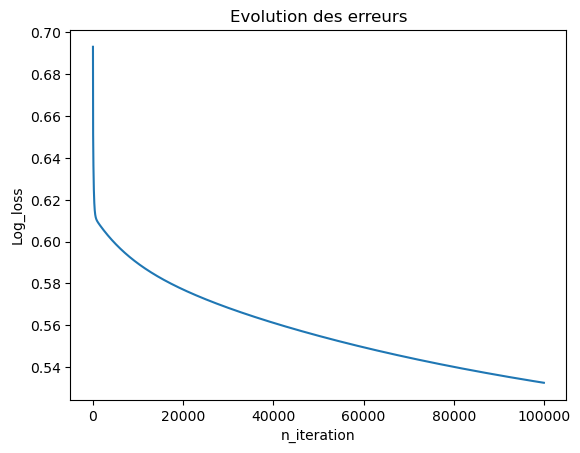

In [122]:
W,b=regression_logistique(X_train, y_train)

# Evaluation du modèle

In [108]:
print(X[2],y[2])

[ 3.    26.     0.     0.     0.     7.925] 1


In [109]:
x_test=np.array([0.07950527,0.68904565,0,0.68904565,0,0 ])

In [110]:
y_pr = predict(x_test, W, b)
y_pr

0.04403297721482248


0

In [123]:
y_pred = predict(X_test, W, b)

[1.         1.         0.99999859 1.         1.         0.9153671
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.99999392 1.         1.         1.  

In [125]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [126]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1], dtype=int64)

In [113]:
y.shape

(887,)

In [114]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)

print(accuracy)

0.38895152198421645


In [115]:
from sklearn.metrics import accuracy_score
y_pred = predict(X, W, b)
print("Accuracy=",accuracy_score(y, y_pred))
#Affichage de la matrice de confusion


[9.88754669e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
 9.99999891e-01 9.99999440e-01 1.00000000e+00 9.99984285e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 9.99989902e-01 1.00000000e+00 9.99999979e-01 1.00000000e+00
 9.99999998e-01 1.00000000e+00 1.00000000e+00 9.99999994e-01
 1.00000000e+00 1.00000000e+00 9.99999989e-01 1.00000000e+00
 9.99999999e-01 1.00000000e+00 9.99992043e-01 1.00000000e+00
 9.99999999e-01 9.99994522e-01 1.00000000e+00 1.00000000e+00
 9.99999992e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
 9.99911652e-01 9.99992533e-01 1.00000000e+00 9.99999985e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 9.99999996e-01
 9.99999507e-01 9.99999997e-01 9.99999999e-01 1.00000000e+00
 1.00000000e+00 1.00000000e+00 9.99987973e-01 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 9.99996289e-01 1.00000000e+00 1.00000000e+00 9.99973592e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 9.99998838e-01 1.000000

In [116]:
from sklearn.metrics import confusion_matrix
y_pred = predict(X, W, b)
cm = confusion_matrix(y, y_pred)

[9.88754669e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
 9.99999891e-01 9.99999440e-01 1.00000000e+00 9.99984285e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 9.99989902e-01 1.00000000e+00 9.99999979e-01 1.00000000e+00
 9.99999998e-01 1.00000000e+00 1.00000000e+00 9.99999994e-01
 1.00000000e+00 1.00000000e+00 9.99999989e-01 1.00000000e+00
 9.99999999e-01 1.00000000e+00 9.99992043e-01 1.00000000e+00
 9.99999999e-01 9.99994522e-01 1.00000000e+00 1.00000000e+00
 9.99999992e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
 9.99911652e-01 9.99992533e-01 1.00000000e+00 9.99999985e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 9.99999996e-01
 9.99999507e-01 9.99999997e-01 9.99999999e-01 1.00000000e+00
 1.00000000e+00 1.00000000e+00 9.99987973e-01 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 9.99996289e-01 1.00000000e+00 1.00000000e+00 9.99973592e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 9.99998838e-01 1.000000

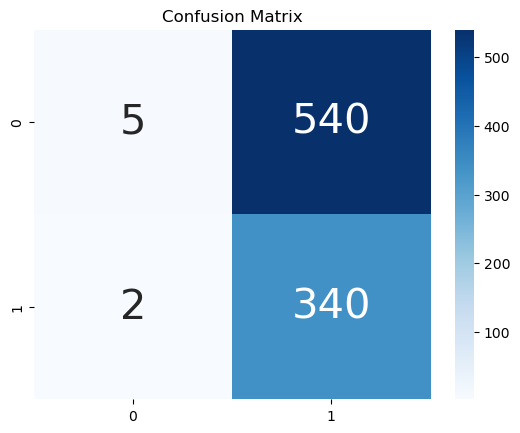

In [117]:
# Plot confusion matrix
import seaborn as sns
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()